In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Because of the warning with K-nearest neighbors some unimportant warning apperas
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='.*mode.*')

In [3]:
# Loading the data for ML model
data = pd.read_csv('training_data.csv')

# Features (all columns except last one)
x = data.iloc[:, :-1]
# Target values (last column)
y = data.iloc[:, -1]

In [4]:
"""
Training data
"""
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y,
    test_size = 0.3, # 30% of data will be split between validation (15%) and testing (15%) rest is training data (70%)
    stratify = y, # Since there are mutliple categories in target values (0, 1, 2) split equally among training and temporary data sets
    random_state = 42 # Random seed
    )

In [5]:
"""
Validation and test data
"""
x_valid, x_test, y_valid, y_test = train_test_split(
    x_temp, y_temp, 
    test_size = 0.5,  # Split the 30% of temporary data into valdiation and testing data sets
    stratify = y_temp, # Split multiple categrories of values equally among validation and testing data sets
    random_state=42 # Random seed
    )

In [6]:
print(f"Training set size: {x_train.shape[0]/x.shape[0]:.3f}")
print(f"Validation set size: {x_valid.shape[0]/x.shape[0]:.3f}")
print(f"Test set size: {x_test.shape[0]/x.shape[0]:.3f}")

print("Class distribution of training set:")
print(y_train.value_counts(normalize=True))

print("Class distribution of validation set:")
print(y_valid.value_counts(normalize=True))

print("Class distribution of test set:")
print(y_test.value_counts(normalize=True))

# We can see that each set has the same distribution of class variables

Training set size: 0.700
Validation set size: 0.150
Test set size: 0.150
Class distribution of training set:
1    0.530758
2    0.325084
0    0.144159
Name: Class, dtype: float64
Class distribution of validation set:
1    0.530813
2    0.325024
0    0.144163
Name: Class, dtype: float64
Class distribution of test set:
1    0.530739
2    0.325118
0    0.144143
Name: Class, dtype: float64


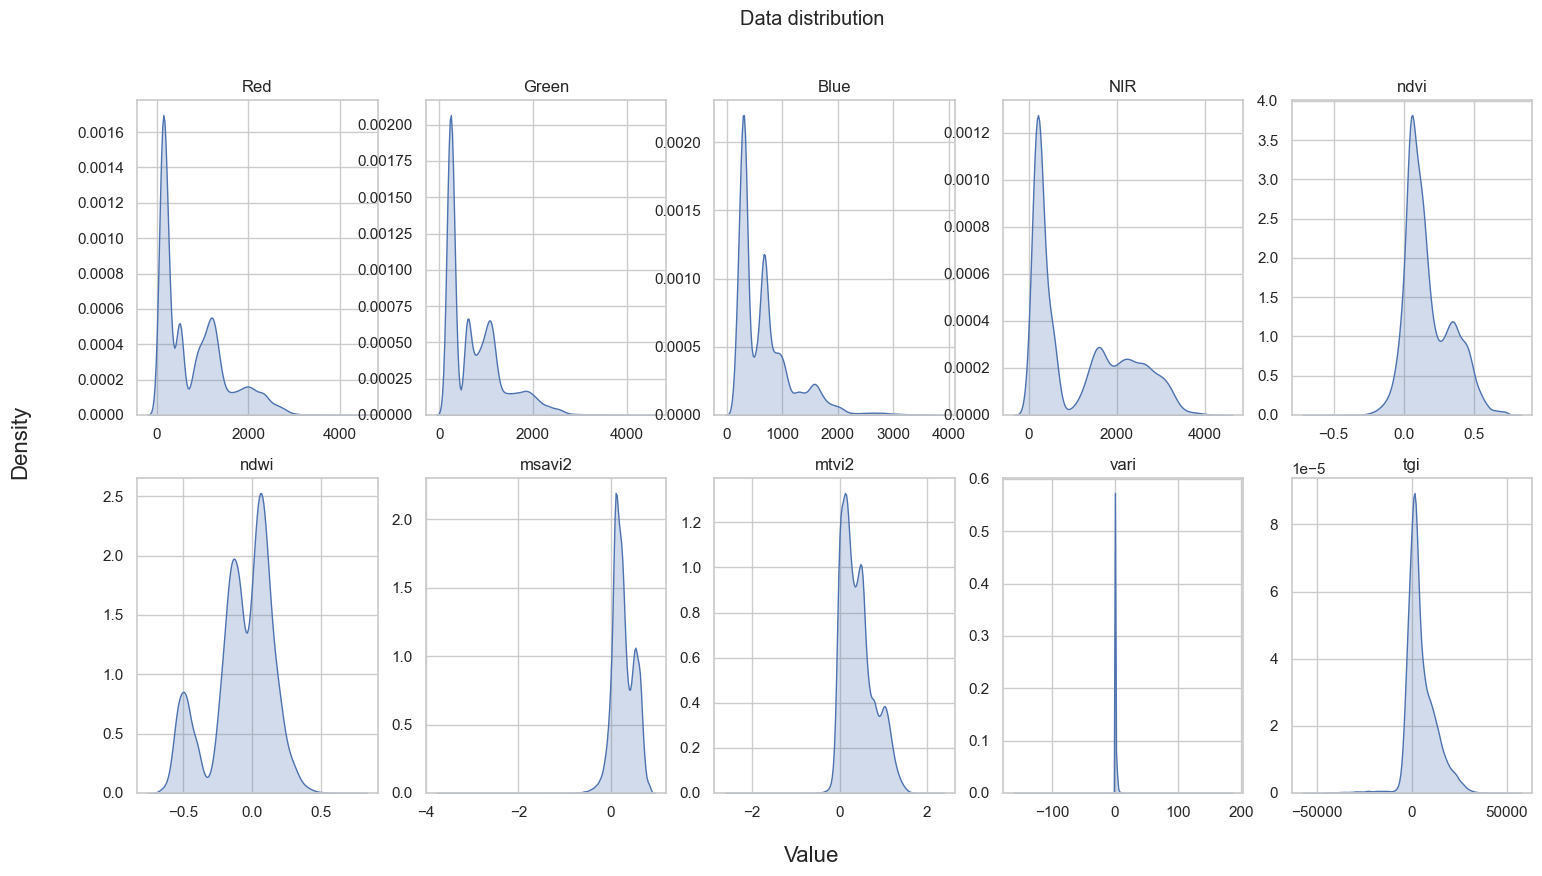

In [7]:
"""
Visualizing data distribution
"""
sns.set(style="whitegrid")

# Create a figure and axis
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(data.columns[:-1]):  # Excluding the last column which is the target variable
    ax = axes[i]
    
    # Plot the kernel density estimate (KDE) to show the bell curve
    sns.kdeplot(data[column], ax=ax, fill=True)
    
    # Set the title of the plot to the column name
    ax.set_title(f'{column}')
    
    # Remove individual axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

# Set global x-axis and y-axis labels
fig.text(0.5, 0.04, 'Value', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical', fontsize=16)

plt.suptitle('Data distribution')
plt.savefig('data_distribution.png', dpi = 300)
plt.show()

In [8]:
""" 
Data normalization
"""
# Data has to be normalized because of the large difference in values

# Initialize scalers
standard_scaler = StandardScaler()

# Fit the scaler on the training data
standard_scaler.fit(x_train)

# Transform the training, validation, and test data
x_train_scaled = standard_scaler.transform(x_train)
x_valid_scaled = standard_scaler.transform(x_valid)
x_test_scaled = standard_scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_valid.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [9]:
""" 
Models list
"""

# Models to initialize and train
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Random Forest Hyperparameters': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier()
}


In [10]:
"""
Dictionary where to store results
"""

# Store results
results = {
    'Model': [],
    'Validation Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Misclassifications': []
}

In [11]:
"""
Training the model and runing predictions for test and validation data
Random Forest Classifier has 2 version --> 1 will have their's parameters hypertuned and other version wont
Visualizing confusion matrix
You can read 
"""

# Create a figure and axis
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Train and evaluate models
for i, (model_name, model) in enumerate(models.items()):
    print(f"Training and evaluating model: {model_name}")
    
    if model_name != "Random Forest Hyperparameters":
        # Train the model
        model.fit(x_train_scaled, y_train)
    
    
    """
    Hypertuning Random Forest Classifier parameters
    """
    
    if model_name == "Random Forest Hyperparameters":
        
        """
        Randomized hypertuning of parameters
        """
        # param_grid = [{
        #     'n_estimators': [100, 150, 200],
        #     'criterion': ['entropy', 'gini'],
        #     'min_samples_split': [2, 5, 8],
        #     'min_samples_leaf': [1, 2, 4],
        #     #'max_depth': [10, 20, 30]
        # }] 
        # model = GridSearchCV(model, param_grid, cv = 2, scoring = 'accuracy', n_jobs = -1)
        
        """
        Less ranzomized  hypertuning of parameters
        """
        param_dist= [{
        'n_estimators': [100, 150, 200],
        'criterion': ['entropy', 'gini'],
        'min_samples_split': [2, 4, 8],
        'min_samples_leaf': [1, 2, 4],
        'max_depth': [10, 20, 30]
        }]
        
        # Less randomized
        model = RandomizedSearchCV(model, param_distributions=param_dist, 
                                   n_iter = 10, cv = 5, scoring='accuracy', 
                                   n_jobs = -1, random_state = 42)
        model.fit(x_train_scaled, y_train)
        
        best_params = model.best_params_
        print("Random Forest Hyperparameters best score:", model.best_score_)
        print("Random Forest Hyperparameters best parameters:", best_params)

        model = RandomForestClassifier(**best_params)
        model.fit(x_train_scaled, y_train)
    
    # Predict and evaluate on validation data
    y_pred_valid = model.predict(x_valid_scaled)
    valid_accuracy = accuracy_score(y_valid, y_pred_valid)
    
    # Predict and evaluate on test data
    y_pred_test = model.predict(x_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Calculate additional metrics
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    # Calculate misclassifications (excluding diagonal elements)
    misclassifications = cm.sum(axis=1) - np.diag(cm)
    
    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Misclassifications'].append(misclassifications)

    # Print detailed performance
    print("Validation Performance:")
    print("Accuracy:", valid_accuracy)
    print("Classification Report:\n", classification_report(y_valid, y_pred_valid))
    print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_valid))


    print("Test Performance:")
    print("Accuracy:", test_accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    print("Confusion Matrix:\n", cm)
    
    ax = axes[i]
    ax.set_title(f'{model_name}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax = ax)
    
# Set global x-axis and y-axis labels
fig.text(0.5, 0.04, 'Predicted Label', ha='center', va='center', fontsize=16)
fig.text(0.06, 0.5, 'True Label', ha='center', va='center', rotation='vertical', fontsize=16)

plt.suptitle('Confusion Matrix - Test data')
plt.close()

Training and evaluating model: Logistic Regression
Validation Performance:
Accuracy: 0.9961224207173521
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       1.00      1.00      1.00      3833
           2       1.00      0.99      0.99      2347

    accuracy                           1.00      7221
   macro avg       0.99      0.99      0.99      7221
weighted avg       1.00      1.00      1.00      7221

Confusion Matrix:
 [[1030    0   11]
 [   0 3833    0]
 [  14    3 2330]]
Test Performance:
Accuracy: 0.9979230130157851
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       1.00      1.00      1.00      3833
           2       1.00      1.00      1.00      2348

    accuracy                           1.00      7222
   macro avg       1.00      1.00      1.00      7222
weighted avg       1

Validation Performance:
Accuracy: 0.9936296911785071
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1041
           1       1.00      1.00      1.00      3833
           2       1.00      0.98      0.99      2347

    accuracy                           0.99      7221
   macro avg       0.99      0.99      0.99      7221
weighted avg       0.99      0.99      0.99      7221

Confusion Matrix:
 [[1032    0    9]
 [   0 3833    0]
 [  30    7 2310]]
Test Performance:
Accuracy: 0.9944613680420936
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1041
           1       1.00      1.00      1.00      3833
           2       1.00      0.99      0.99      2348

    accuracy                           0.99      7222
   macro avg       0.99      0.99      0.99      7222
weighted avg       0.99      0.99      0.99      7222

Confusion Matrix

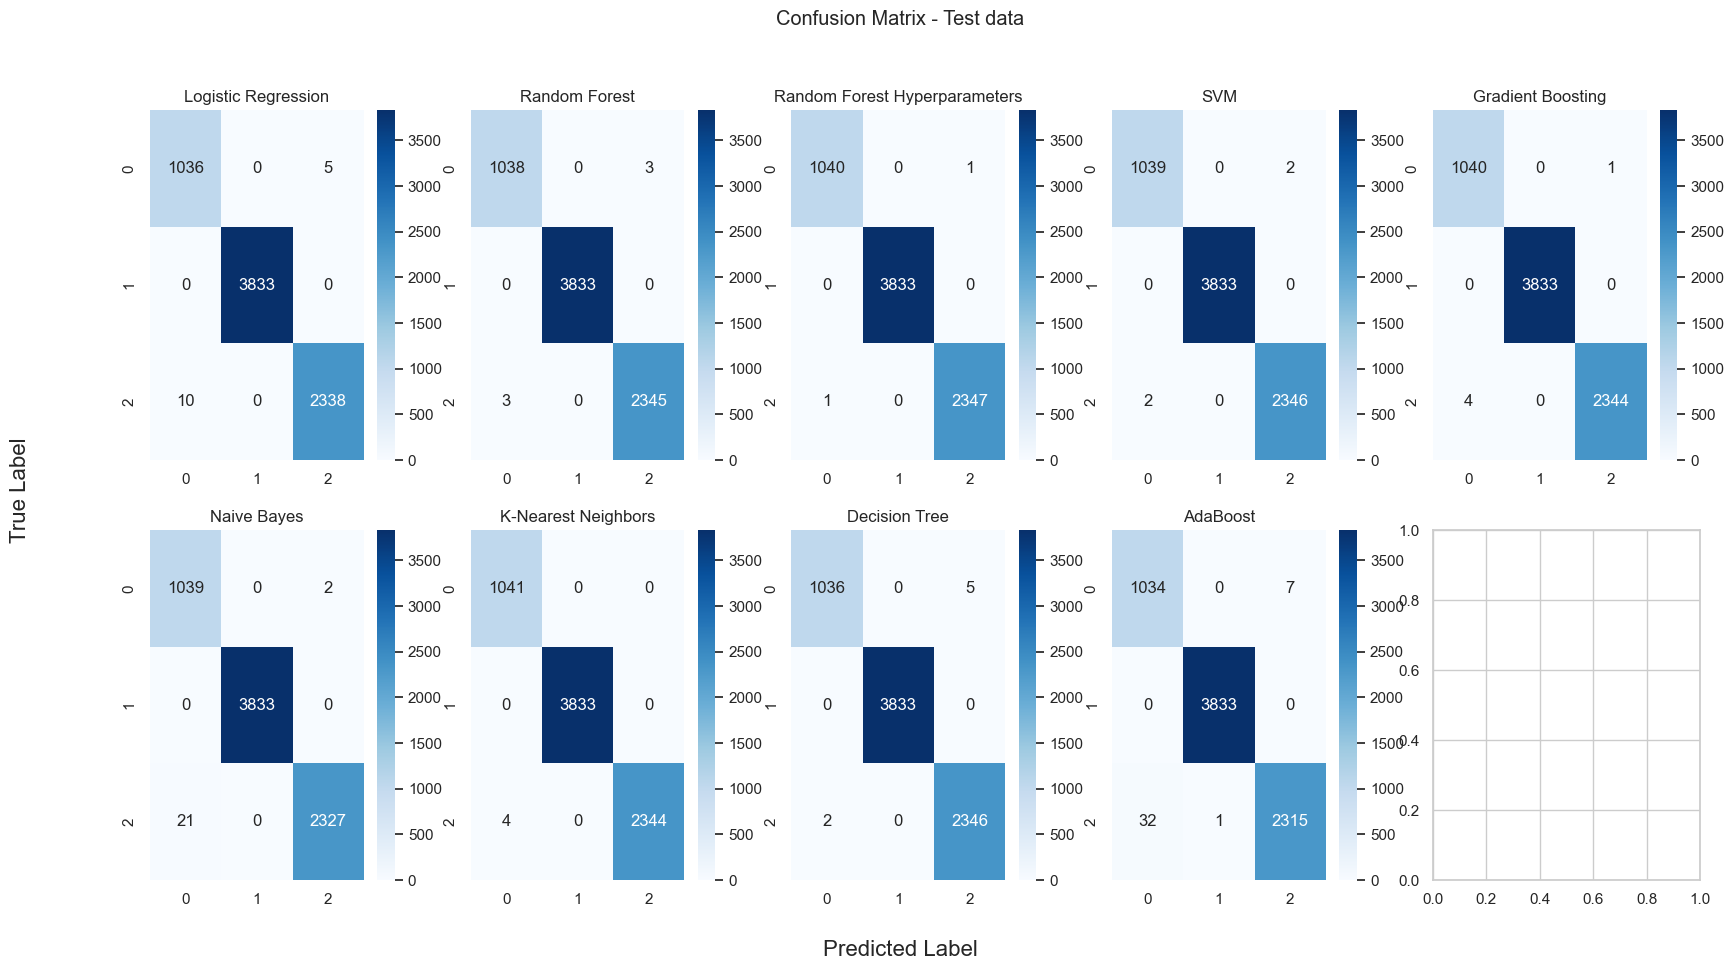

In [12]:
# Showcasing confusion matrix
fig

In [13]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
results_df.to_csv('Model_statistics.csv', index = False)
print("Comparison of Models:")
print(results_df)

Comparison of Models:
                           Model  Validation Accuracy  Test Accuracy  \
2  Random Forest Hyperparameters             0.998477       0.999723   
3                            SVM             0.998615       0.999446   
6            K-Nearest Neighbors             0.999169       0.999446   
4              Gradient Boosting             0.998615       0.999308   
1                  Random Forest             0.998200       0.999169   
7                  Decision Tree             0.997646       0.999031   
0            Logistic Regression             0.996122       0.997923   
5                    Naive Bayes             0.995568       0.996815   
8                       AdaBoost             0.993630       0.994461   

   Precision    Recall  F1 Score Misclassifications  
2   0.999723  0.999723  0.999723          [1, 0, 1]  
3   0.999446  0.999446  0.999446          [2, 0, 2]  
6   0.999448  0.999446  0.999446          [0, 0, 4]  
4   0.999309  0.999308  0.999308         

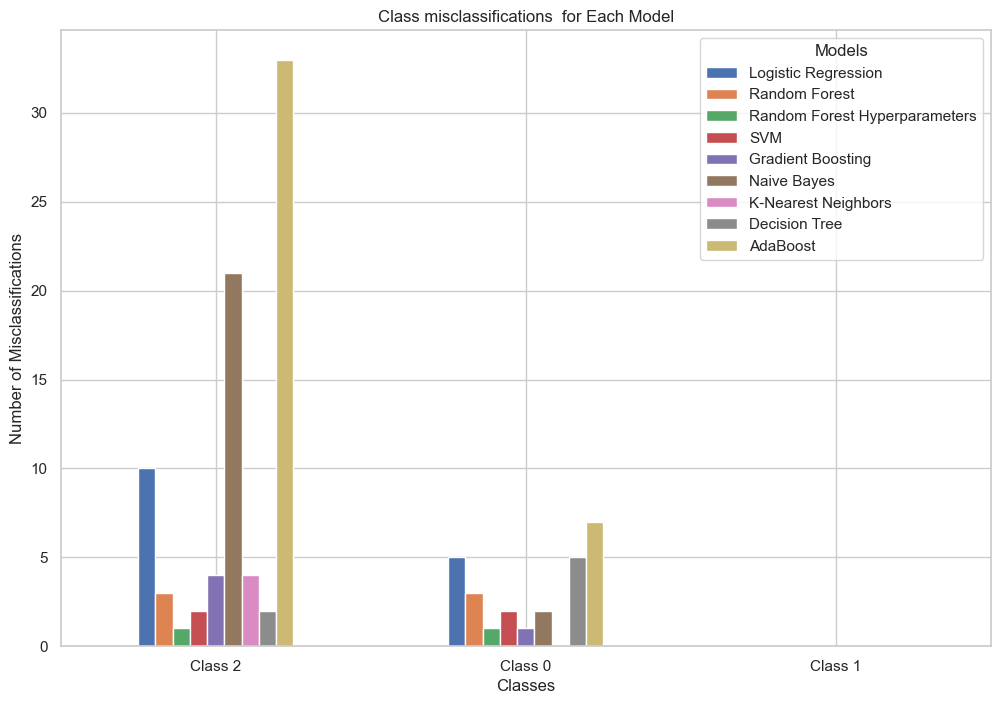

In [14]:
"""
Visualizing number of misclassifications by model
"""
# Convert the results into a DataFrame for easier manipulation
misclassification_df = pd.DataFrame(
    {model_name: misclass for model_name, misclass in zip(results['Model'], results['Misclassifications'])},
    index=[f'Class {i}' for i in range(cm.shape[0])]
)

# Calculate the total misclassifications across all models for sorting
misclassification_df['Total Misclassifications'] = misclassification_df.sum(axis=1)

# Sort the DataFrame by the total number of misclassifications
misclassification_df = misclassification_df.sort_values(by='Total Misclassifications', ascending=False)

# Drop the 'Total Misclassifications' column for plotting (optional)
misclassification_df = misclassification_df.drop(columns=['Total Misclassifications'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the sorted misclassification data
misclassification_df.plot(kind='bar', ax=ax)

# Global labels
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Misclassifications')
ax.set_title('Class misclassifications  for Each Model')

plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()